In [ ]:
import tensorflow as tf
import os
import numpy as np

In [ ]:
base_dir=r"E:\Study DS\dogs-vs-cats\train"
#"E:\Study DS\dogs-vs-cats\train"

In [ ]:
#preprocessing

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=128

# ImageDataGenerator for training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    zoom_range=0.2,   # Randomly zoom images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.1  # Reserve 10% of the data for validation
)

# ImageDataGenerator for validation data (testing data in this context)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    validation_split=0.1  # Specify the same validation split as for training
)


#### Why we use tf.keras.preprocessing.image.ImageDataGenerator in simple terms:

#### Making More Data:

Imagine you want a computer to learn to recognize dogs and cats from pictures. To help it learn better, you show it lots of pictures of dogs and cats. But, instead of showing the same pictures over and over, you can make new pictures from the ones you already have. This is like taking a picture of a dog and making a slightly different version by flipping it or zooming in a bit. This way, the computer sees more types of pictures, which helps it learn better.



#### Getting the Pictures Ready: 

When you take a picture with a camera, the colors and brightness of each dot (pixel) are different. Before the computer can learn from these pictures, we make sure all the pixels have numbers that are easy for the computer to understand. This is called normalization. The ImageDataGenerator does this for us, so we don't have to do it by hand.



####  Using Less Memory:


If you have lots and lots of pictures (like thousands), you can't put them all into the computer's memory at once because there isn't enough space. The ImageDataGenerator helps by loading just a few pictures at a time, transforming them as needed, and then giving them to the computer to learn from. This makes it possible to train on huge datasets without using up all the computer's memory.



#### Training the Computer: 

Once we have all our pictures ready and the computer knows how to read them, we start training. The ImageDataGenerator helps during this training by providing batches of pictures that are already transformed and ready to be used. It makes sure each batch of pictures is prepared in the same way, which keeps the training fair and helps the computer learn as best as it can.

In [1]:
train_generator = train_datagen.flow_from_directory(
    base_dir,                    # Path to the target directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to 224x224 pixels
    batch_size=BATCH_SIZE,       # Number of images per batch
    subset='training'            # Use subset 'training' from the directory
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,                    # Path to the target directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to 224x224 pixels
    batch_size=BATCH_SIZE,       # Number of images per batch
    subset='validation'          # Use subset 'validation' from the directory
)


NameError: name 'train_datagen' is not defined

we use train_datagen (which stands for "training data generator") to prepare our training images before feeding them into a machine learning model. Here’s why we use it:

Normalization: The rescale=1./255 part of train_datagen ensures that all pixel values in our images are scaled to a range between 0 and 1. This normalization step helps the model learn more effectively because it prevents large pixel value differences from overwhelming the learning process.

Data Augmentation: The zoom_range=0.2 and horizontal_flip=True parameters introduce variations into our training images. Zooming randomly alters the scale of the images slightly, while horizontal flipping creates mirrored versions of the images. These variations help the model generalize better, meaning it can learn to recognize objects in different orientations and sizes, making it more robust when applied to new, unseen data.

Validation Split: By setting validation_split=0.1, we reserve 10% of our training data specifically for validation purposes. This means that after our images are processed and augmented, a portion of them is set aside to evaluate how well our model is learning during training. It’s crucial to validate the model on data it hasn’t seen before to ensure it can generalize well beyond the training set.

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense  # Importing necessary layers from Keras
from tensorflow.keras.models import Model, Sequential  # Importing Model class and Sequential model from Keras
from tensorflow.keras.applications.vgg16 import VGG16  # Importing the VGG16 model architecture from Keras applications
from glob import glob  # Importing glob module to handle file path expansion


In [ ]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)   #image size 224*244*  and the 3 is 3 channel RGB and weight are similar to to imagenet dataset pre trained
vgg.output               # downloading the model

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
IMAGE_SIZE = [224, 224]  # Define the target image size as 224x224 pixels

# Create a VGG16 model with specified input shape and weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3],  # Input shape is 224x224 pixels with 3 channels (RGB)
            weights='imagenet',           # Use pre-trained weights from the ImageNet dataset
            include_top=False)            # Exclude the top (fully connected) layers of the VGG16 model

vgg.output  # The output layer of the VGG16 model

# Note: The weights='imagenet' parameter initializes the model with weights pre-trained on the ImageNet dataset,
# which helps in leveraging existing knowledge from a large dataset of various images.


In [ ]:
# Now when you set the trainable property of a model as False it would skip the weight update step.

# Iterate through each layer in the VGG16 model and set trainable=False
for layer in vgg.layers:
    layer.trainable = False


In [ ]:
from glob import glob  # Importing glob module to handle file path expansion

# Glob all folders in the specified directory
folders = glob(r"E:\Study DS\dogs-vs-cats\train\*")

# Print the number of folders found
print(len(folders))


2


In [ ]:
x = Flatten()(vgg.output)  # Flatten the output of VGG16 to pass it to a fully connected Dense layer

# Create a Dense layer for predictions with softmax activation
prediction = Dense(len(folders), activation='softmax')(x)

# Define the model with VGG16's input and the Dense prediction layer as output
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()  # Print a summary of the model architecture


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy',   # Use binary cross-entropy loss function
              optimizer='adam',              # Use Adam optimizer for training
              metrics=['accuracy'])          # Monitor accuracy metric during training


In [ ]:
epoch = 5  # Number of training epochs

history = model.fit(train_generator,            # Training data generator
                    steps_per_epoch=len(train_generator),  # Number of steps (batches) per epoch
                    epochs=epoch,             # Number of epochs to train the model
                    validation_data=validation_generator,  # Validation data generator
                    validation_steps=len(validation_generator)  # Number of validation steps per epoch
                   )


Epoch 1/5
176/176 [==============================] - 1960s 11s/step - loss: 0.2932 - accuracy: 0.8761 - val_loss: 0.2035 - val_accuracy: 0.9196
Epoch 2/5
176/176 [==============================] - 1931s 11s/step - loss: 0.1919 - accuracy: 0.9240 - val_loss: 0.1727 - val_accuracy: 0.9296
Epoch 3/5
176/176 [==============================] - 1925s 11s/step - loss: 0.1698 - accuracy: 0.9311 - val_loss: 0.1661 - val_accuracy: 0.9328
Epoch 4/5
176/176 [==============================] - 1924s 11s/step - loss: 0.1587 - accuracy: 0.9366 - val_loss: 0.1630 - val_accuracy: 0.9364
Epoch 5/5
176/176 [==============================] - 1985s 11s/step - loss: 0.1469 - accuracy: 0.9415 - val_loss: 0.1581 - val_accuracy: 0.9360


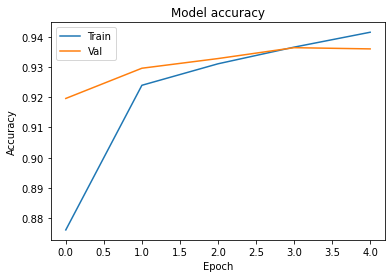

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

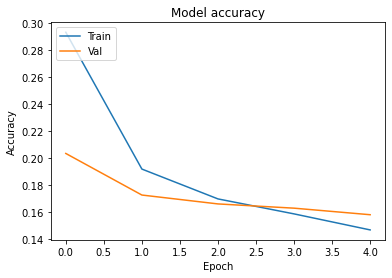

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# prediction

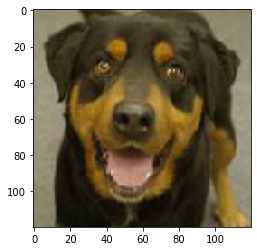

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# load the image
img = load_img(r"E:\Study DS\dogs-vs-cats\test1\test1\137.jpg", target_size=(120,120))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()


In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

img_pred=image.load_img(r"E:\Study DS\dogs-vs-cats\test1\test1\137.jpg",target_size=(224,224))
#"E:\Study DS\dogs-vs-cats\test1\test1\30.jpg"
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="cat"
    
    
else:
    prediction="dog"
print(prediction)

1/1 [==============================] - 0s 93ms/step
[[0. 1.]]
dog


In [ ]:
# Save the entire model to a file
model.save('my_modelcatndog.h5')

'''
Saving the model:
You can save the model and its architecture by calling the save() method on the trained model object. 
This method saves the entire model (architecture, weights, and optimizer state) to a file in the specified format.
'''

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_modelcatndog.h5')


In [1]:
#AI/ML Engineer - Saurav
#Date - 13 June 2024
#Time - 17:00